# Zadanie 4
Wczytaj zbiór danych o obrazach twarzy, np. zbiór danych Labeled Faces in the Wild (LFW).
Wykonaj redukcję wymiarowości danych za pomocą metody NMF. Wybierz kilka cech (składających się na macierz bazową) i wyświetl je w postaci obrazów, aby zobaczyć, jakie cechy
zostały wykryte przez algorytm.
Zbiór danych LFW z biblioteki sikit-learn zawiera tysiące zdjęć twarzy różnych osób, z etykietami określającymi tożsamość każdej osoby. Może być wykorzystywany do zadań redukcji
wymiarowości w celu wizualizacji przestrzeni cech twarzy.

In [1]:
import  pandas as pd
import  numpy as np
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
data = np.c_[lfw_people.data, lfw_people.target]
target_names = lfw_people.target_names
df = pd.DataFrame(data)

C:\Users\jakub\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


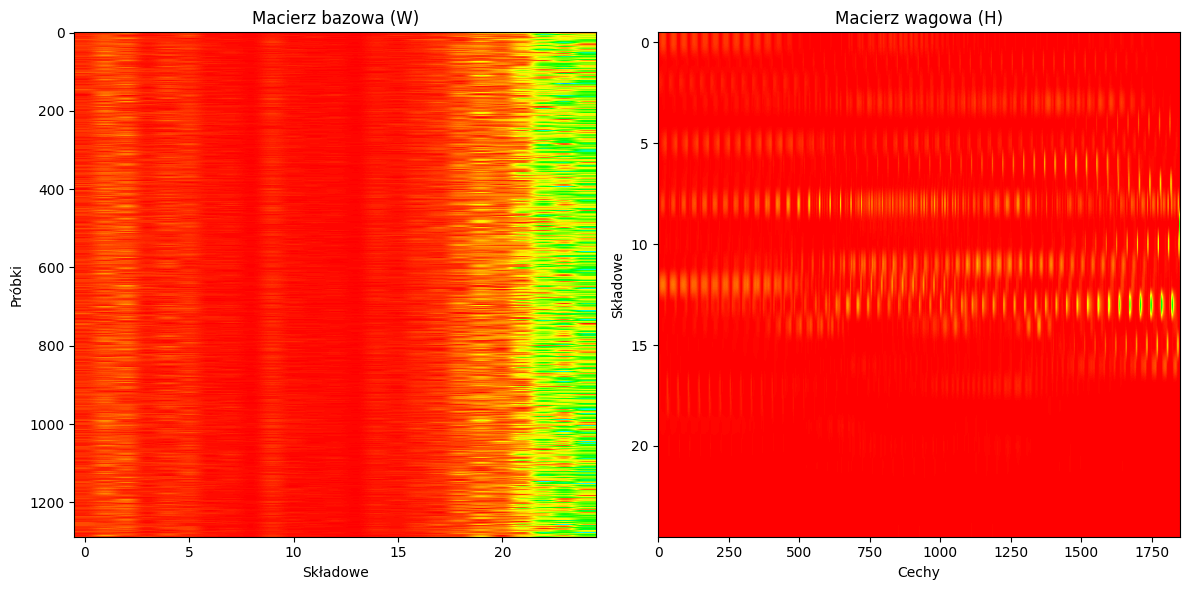

In [3]:
# Tworzenie obiektu NMF
test_data = df.loc[:, df.columns != '1850']
nmf_model = NMF(n_components=25) 
nmf_model.fit(test_data)
W = nmf_model.transform(test_data) 
H = nmf_model.components_ 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(W, cmap='hsv', aspect='auto')
plt.title('Macierz bazowa (W)')
plt.xlabel('Składowe')
plt.ylabel('Próbki')
plt.subplot(1, 2, 2)
plt.imshow(H, cmap='hsv', aspect='auto')
plt.title('Macierz wagowa (H)')
plt.xlabel('Cechy')
plt.ylabel('Składowe')
plt.tight_layout()
plt.show()